In [29]:
import pandas as pd
df = pd.read_csv("/content/Crop_recommendation.csv")

In [30]:
df.head()

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,rice


In [31]:
df.shape

(1400, 6)

In [32]:
df.columns

Index(['temperature', 'humidity', 'ph', 'water availability', 'season',
       'label'],
      dtype='object')

In [33]:
df.isnull().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
unique_labels = df['label'].unique()
print(unique_labels)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'watermelon' 'muskmelon' 'cotton' 'jute']


In [36]:
value_counts = df['label'].value_counts()
value_counts

label
maize          200
rice           100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
watermelon     100
muskmelon      100
cotton         100
jute           100
Name: count, dtype: int64

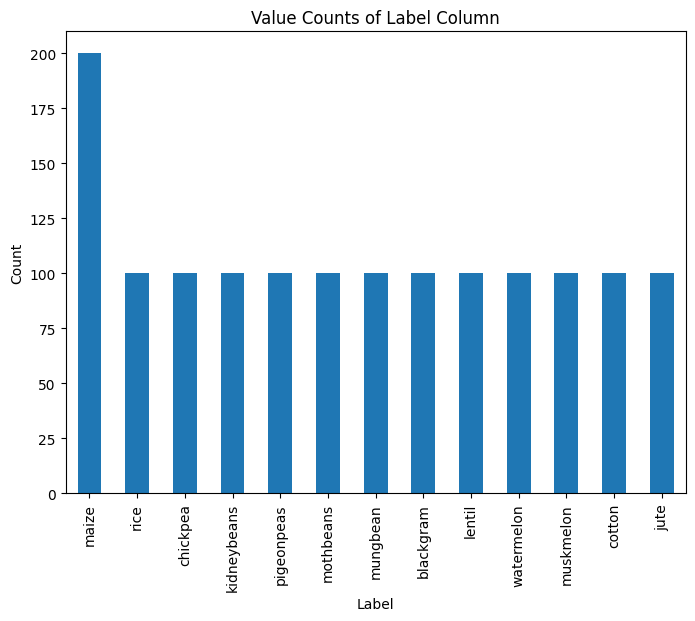

In [37]:
import matplotlib.pyplot as plt

value_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
dtypes: float64(4), object(2)
memory usage: 65.8+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])
df['label'] = label_encoder.fit_transform(df['label'])

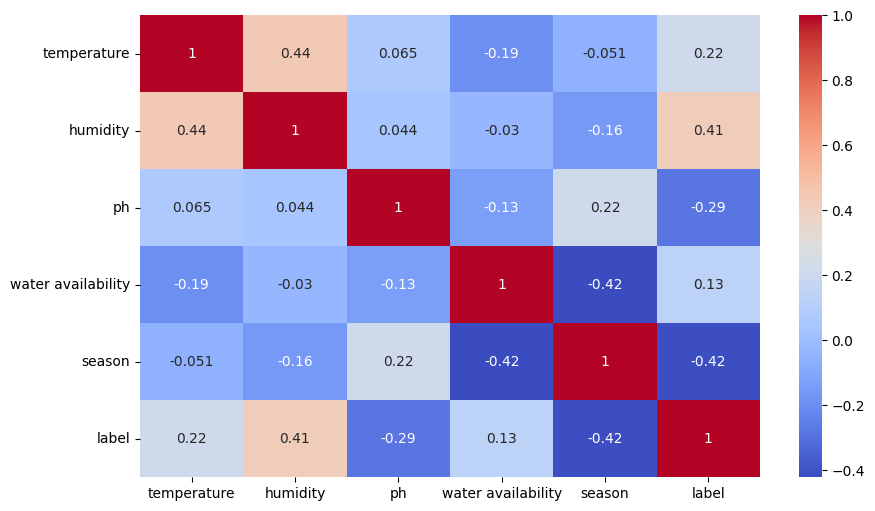

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [41]:
X = df.drop('label', axis=1)
y = df['label']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
28/28 [==============================] - 1s 11ms/step - loss: 7.5426 - accuracy: 0.1049 - val_loss: 2.6749 - val_accuracy: 0.2054
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 2.4177 - accuracy: 0.1016 - val_loss: 2.2825 - val_accuracy: 0.2232
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 2.2560 - accuracy: 0.1763 - val_loss: 2.1640 - val_accuracy: 0.2054
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 2.1388 - accuracy: 0.1763 - val_loss: 2.0032 - val_accuracy: 0.2277
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 1.9885 - accuracy: 0.2377 - val_loss: 1.8425 - val_accuracy: 0.2768
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 1.8453 - accuracy: 0.2891 - val_loss: 1.7330 - val_accuracy: 0.3527
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 1.7396 - accuracy: 0.3929 - val_loss: 1.6550 - val_accuracy: 0.3973
Epoch 8/50
28/28 [=

In [61]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


9/9 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8679
Test Accuracy: 0.8678571581840515


In [47]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes)

print(report)


9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.86      0.78        22
           1       1.00      1.00      1.00        22
           2       0.69      0.64      0.67        14
           3       0.76      0.72      0.74        18
           4       1.00      1.00      1.00        20
           5       0.85      0.96      0.90        23
           6       0.73      0.85      0.79        39
           7       0.93      0.64      0.76        22
           8       1.00      0.86      0.92        21
           9       1.00      1.00      1.00        20
          10       1.00      0.85      0.92        20
          11       0.85      0.89      0.87        19
          12       1.00      1.00      1.00        20

    accuracy                           0.87       280
   macro avg       0.89      0.87      0.87       280
weighted avg       0.88      0.87      0.87       280



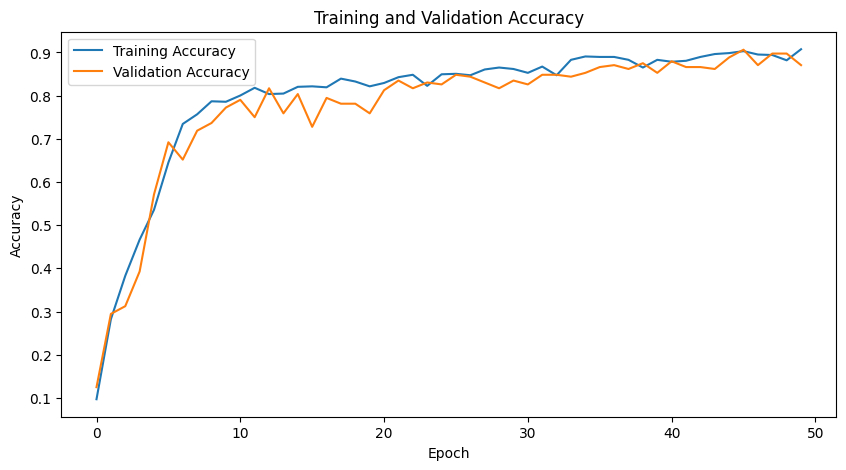

In [48]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

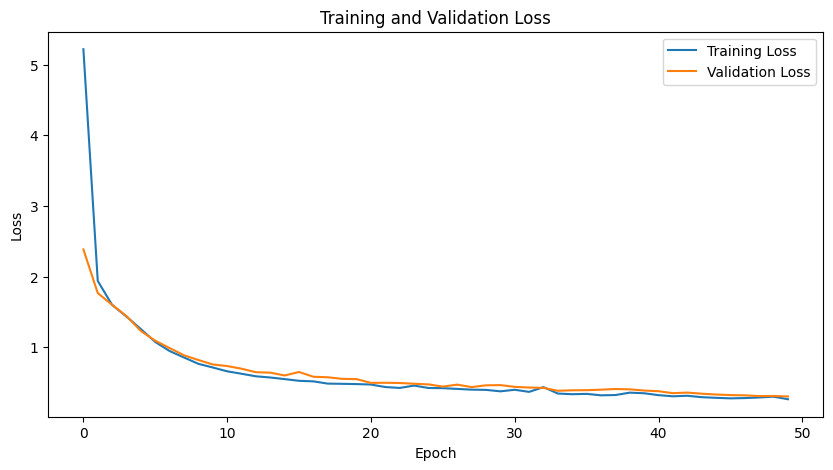

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

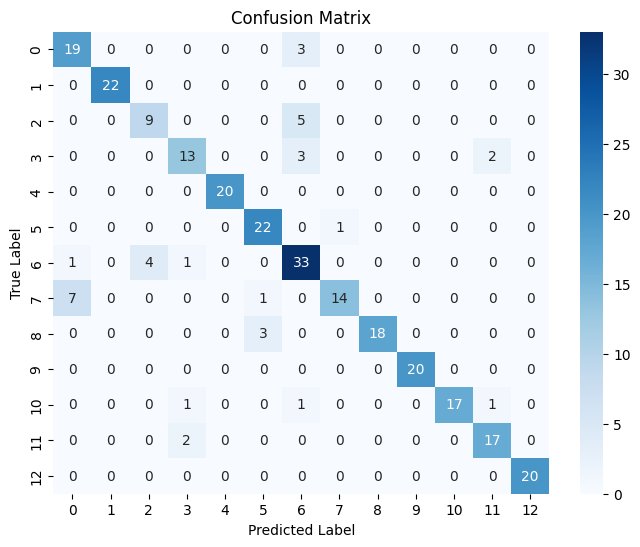

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [63]:
cm

array([[19,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  3,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  4,  1,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  1,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  0,  0, 17,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])